# Getting Started

In [1]:
!pip install transformers rouge_score evaluate datasets

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 34.2 MB/s eta 0:00:00
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=bc76a17ed92bfec9cc34c9edaff45ccfe8699f4d2f7e65b5c8d42740e80852ec
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that 

In [2]:
! pip install transformers[torch]
! pip install accelerate>=0.20.1 -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 8.2 MB/s eta 0:00:00


In [3]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `sr

In [4]:
! huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

# Using a Trained Model

In [5]:
%%time

# load a fine-tuned image captioning model and corresponding tokenizer and image processor
finetuned_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
finetuned_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
finetuned_image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# new model name (used later to push to HF hug)
new_model = "vit_gpt2_image_captioning_coco2014"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/config.json
Model config VisionEncoderDecoderConfig {
  "_name_or_path": "vit-gpt-pt",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "bos_token_id": 50256,
  "decoder": {
    "_name_or_path": "",
    "activation_function": "gelu_new",
    "add_cross_attention": true,
    "architectures": [
      "GPT2LMHeadModel"
    ],
    "attn_pdrop": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 50256,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": 50256,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "embd_pdrop": 0.1,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 50256,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bo

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/pytorch_model.bin
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256
}

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256
}

All model checkpoint weights were used when initializing VisionEncoderDecoderModel.

All the weights of VisionEncoderDecoderModel were initialized from the model checkpoint at nlpconnect/vit-gpt2-image-captioning.
If your task is similar to the task the model of the checkpoint was trained on, you can already use VisionEncoderDecoderModel for predictions without further training.
Generation config file not found, using a generation config created from the model config.


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/tokenizer_config.json


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--nlpconnect--vit-gpt2-image-captioning/snapshots/dc68f91c06a1ba6f15268e5b9c13ae7a7c514084/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}, {'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



CPU times: user 9.24 s, sys: 2.62 s, total: 11.9 s
Wall time: 13.2 s


In [6]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)


# a function to perform inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)
    # preprocess the image
    img = image_processor(image, return_tensors="pt").to(device)
    # generate the caption (using greedy decoding by default)
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

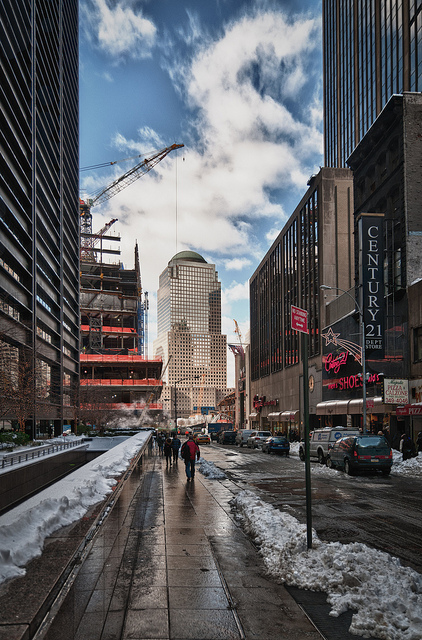

Generate config GenerationConfig {
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256
}

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


'a person walking down a street with a snow covered sidewalk '

In [7]:
# load displayer
from IPython.display import display

url = "http://images.cocodataset.org/test-stuff2017/000000009384.jpg"
display(load_image(url))
get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)

# Fine-tuning your Own Image Captioning Model

## Loading the Model

In [8]:
%%time

# the encoder model that process the image and return the image features
# encoder_model = "WinKawaks/vit-small-patch16-224"
# encoder_model = "google/vit-base-patch16-224"
# encoder_model = "google/vit-base-patch16-224-in21k"
encoder_model = "microsoft/swin-base-patch4-window7-224-in22k"
# the decoder model that process the image features and generate the caption text
# decoder_model = "bert-base-uncased"
# decoder_model = "prajjwal1/bert-tiny"
decoder_model = "gpt2"
# load the model
model = VisionEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_model, decoder_model
).to(device)

config.json:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Streaming output truncated to the last 5000 lines.
    "rose_window, rosette": 9916,
    "roseate_spoonbill, Ajaia_ajaja": 1912,
    "rosebay, Rhododendron_maxima": 19033,
    "rosebud": 17526,
    "rosebud_cherry, winter_flowering_cherry, Prunus_subhirtella": 20120,
    "rosebud_orchid, Cleistes_rosea, Pogonia_rosea": 18520,
    "rosefish, ocean_perch, Sebastodes_marinus": 4079,
    "roselle, rozelle, sorrel, red_sorrel, Jamaica_sorrel, Hibiscus_sabdariffa": 18887,
    "rosemary": 13339,
    "rosemary, Rosmarinus_officinalis": 20711,
    "rosewood, rosewood_tree": 19778,
    "rosilla, Helenium_puberulum": 18324,
    "rosin_bag": 9917,
    "rosinweed, Silphium_laciniatum": 18422,
    "rosita, Centaurium_calycosum": 19186,
    "rosy_boa, Lichanura_trivirgata": 1199,
    "rotary_actuator, positioner": 9918,
    "rotary_engine": 9919,
    "rotary_press": 9920,
    "rotating_mechanism": 9921,
    "rotating_shaft, shaft": 9922,
    "rotavirus": 258,
    "rotgut": 13998,
    "rotifer": 1728,

model.safetensors:   0%|          | 0.00/437M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--microsoft--swin-base-patch4-window7-224-in22k/snapshots/68dc76680a5bf3bdf670669f3025dc9be2e30781/model.safetensors
Some weights of the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k were not used when initializing SwinModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of SwinModel were initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224-in22k.
If your task is similar to the task the model of the

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_vers

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/model.safetensors
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256
}

All model checkpoint weights were used when initializing GPT2LMHeadModel.

Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.6.crossattention.q_attn.bias', 'h.9.crossattention.c_proj.weight', 'h.4.crossattention.c_proj.weight', 'h.10.ln_cross_attn.weight', 'h.9.crossattention.q_attn.weight', 'h.7.ln_cross_attn.weight', 'h.1.ln_cross_attn.weight', 'h.5.crossattention.c_proj.bias', 'h.7.crossattention.q_attn.bias', 'h.9.crossattention.q_attn.bias', 'h.6.crossattention.c_attn.bias', 'h.0.crossattention.c_proj.weight', 'h.0.crossattention.c_attn.weight', 'h.2.crossattention.q_attn.weight', 'h.4.crossattention.c_attn.weight', 'h.2.crossattention.c_proj.weight', 'h.10.crossatten

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/generation_config.json
Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256
}

Setting `config.is_decoder=True` and `config.add_cross_attention=True` for decoder_config
Generate config GenerationConfig {}



CPU times: user 6.3 s, sys: 1.46 s, total: 7.77 s
Wall time: 8.83 s


In [9]:
%%time

# initialize the tokenizer
# tokenizer = AutoTokenizer.from_pretrained(decoder_model)
tokenizer = GPT2TokenizerFast.from_pretrained(decoder_model)
# tokenizer = BertTokenizerFast.from_pretrained(decoder_model)
# load the image processor
image_processor = ViTImageProcessor.from_pretrained(encoder_model)

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/11c5a3d5811f50298f278a704980280950aedb10/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_ran

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--microsoft--swin-base-patch4-window7-224-in22k/snapshots/68dc76680a5bf3bdf670669f3025dc9be2e30781/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}, {'longest_edge'}), got 224. Converted to {'height': 224, 'width': 224}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



CPU times: user 198 ms, sys: 19.1 ms, total: 217 ms
Wall time: 2.3 s


In [10]:
if "gpt2" in decoder_model:
  # gpt2 does not have decoder_start_token_id and pad_token_id
  # but has bos_token_id and eos_token_id
  tokenizer.pad_token = tokenizer.eos_token # pad_token_id as eos_token_id
  model.config.eos_token_id = tokenizer.eos_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  # set decoder_start_token_id as bos_token_id
  model.config.decoder_start_token_id = tokenizer.bos_token_id
else:
  # set the decoder start token id to the CLS token id of the tokenizer
  model.config.decoder_start_token_id = tokenizer.cls_token_id
  # set the pad token id to the pad token id of the tokenizer
  model.config.pad_token_id = tokenizer.pad_token_id

## Downloading & Loading the Dataset

In [11]:
%%time

from datasets import load_dataset

max_length = 32 # max length of the captions in tokens
coco_dataset_ratio = 50 # 50% of the COCO2014 dataset
train_ds = load_dataset("HuggingFaceM4/COCO", split=f"train[:{coco_dataset_ratio}%]")
valid_ds = load_dataset("HuggingFaceM4/COCO", split=f"validation[:{coco_dataset_ratio}%]")
test_ds = load_dataset("HuggingFaceM4/COCO", split="test")
len(train_ds), len(valid_ds), len(test_ds)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for HuggingFaceM4/COCO contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/HuggingFaceM4/COCO
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

CPU times: user 5min 29s, sys: 1min 10s, total: 6min 40s
Wall time: 14min 4s


(283374, 12505, 25010)

## Preprocessing the Inputs

In [12]:
%%time

import numpy as np

# remove the images with less than 3 dimensions (possibly grayscale images)
train_ds = train_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)
valid_ds = valid_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)
test_ds = test_ds.filter(lambda item: np.array(item["image"]).ndim in [3, 4], num_proc=2)

Filter (num_proc=2):   0%|          | 0/283374 [00:00<?, ? examples/s]

Filter (num_proc=2):   0%|          | 0/12505 [00:00<?, ? examples/s]

Filter (num_proc=2):   0%|          | 0/25010 [00:00<?, ? examples/s]

CPU times: user 10.8 s, sys: 2.26 s, total: 13 s
Wall time: 10min 30s


```python
def preprocess(items):
    # preprocess the image
    pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)
    # tokenize the caption with truncation and padding
    targets = tokenizer([ sentence["raw"] for sentence in items["sentences"] ],
                        max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
    return {'pixel_values': pixel_values, 'labels': targets["input_ids"]}
```

This code snippet is part of a data preprocessing function named `preprocess`, typically used in machine learning pipelines where both images and textual data (captions) are processed for model training or inference. The function processes a batch of items, where each item contains an image and its associated captions (sentences). The purpose is to prepare the data in a format suitable for a machine learning model, usually for tasks like image captioning, where the model needs to understand and generate descriptions for images. Here's a breakdown of the function:

```python
def preprocess(items):
```
- Defines the function `preprocess` that takes `items` as an argument. `items` is expected to be a dictionary or a complex data structure containing "image" and "sentences".

```python
  pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)
```
- This line processes the image part of each item. `image_processor` is a function or an object's method (not shown in the snippet) that applies certain preprocessing steps to the image (e.g., resizing, normalization) to make it suitable for a neural network. `return_tensors="pt"` suggests that the processed image data should be returned as PyTorch tensors. `.pixel_values` extracts the tensor representing the pixel values of the processed image.
- `to(device)` moves the tensor to a specified computing device (like CPU or CUDA GPU), which is important for training or inference in PyTorch to ensure that the data and model are on the same device.

```python
  targets = tokenizer([ sentence["raw"] for sentence in items["sentences"] ],
                      max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
```
- This line processes the captions associated with each image. It first extracts the raw text of the captions from `items["sentences"]`. The `tokenizer` is a function or object's method (not shown in the snippet) that converts these raw texts into a format that a neural network can work with (tokenization). The tokenizer might also include steps like converting words to token IDs, padding sequences to a consistent length (`max_length`), and truncating longer sequences.
- `max_length` is a variable (not defined in this snippet) that specifies the maximum length of the tokenized sequences. `padding="max_length"` ensures all sequences are padded to this length. `truncation=True` enables the truncation of sequences longer than `max_length`. `return_tensors="pt"` indicates that the output should be PyTorch tensors.
- Again, `to(device)` moves the tokenized caption data to the specified device.

```python
  return {'pixel_values': pixel_values, 'labels': targets["input_ids"]}
```
- Finally, the function returns a dictionary with two keys: `pixel_values` and `labels`. `pixel_values` contains the preprocessed pixel values of the images, and `labels` contains the input IDs from the tokenized captions. This format is typically used for training or evaluating models where the input is an image and the target is a textual description (e.g., in tasks like image captioning).

In summary, the `preprocess` function prepares both images and their corresponding captions for processing by a neural network, converting raw data into a format (tensors) that is suitable for machine learning tasks involving both visual and textual data.

In [13]:
def preprocess(items):
    # preprocess the image
    pixel_values = image_processor(items["image"], return_tensors="pt").pixel_values.to(device)
    # tokenize the caption with truncation and padding
    targets = tokenizer([ sentence["raw"] for sentence in items["sentences"] ],
                        max_length=max_length, padding="max_length", truncation=True, return_tensors="pt").to(device)
    return {'pixel_values': pixel_values, 'labels': targets["input_ids"]}


# using with_transform to preprocess the dataset during training
train_dataset = train_ds.with_transform(preprocess)
valid_dataset = valid_ds.with_transform(preprocess)
test_dataset  = test_ds.with_transform(preprocess)

In [14]:
# a function we'll use to collate the batches
def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.stack([x['labels'] for x in batch])
    }

## Evaluation Metrics

```python
def compute_metrics(eval_pred):
    preds = eval_pred.label_ids
    labels = eval_pred.predictions
    # decode the predictions and labels
    pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # compute the rouge score
    rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
    # multiply by 100 to get the same scale as the rouge score
    rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
    # compute the bleu score
    bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
    # get the length of the generated captions
    generation_length = bleu_result["translation_length"]
    return {
        **rouge_result,
        "bleu": round(bleu_result["bleu"] * 100, 4),
        "gen_len": bleu_result["translation_length"] / len(preds)
    }
```

This code snippet defines a function `compute_metrics` used in the evaluation of machine learning models, particularly those involved in natural language processing (NLP) tasks such as translation, summarization, or image captioning. The function computes various metrics, including ROUGE and BLEU scores, to assess the quality of the model's predictions against ground truth labels. It also calculates the average length of the generated text. Here's a detailed explanation:

```python
def compute_metrics(eval_pred):
```
- The function `compute_metrics` takes a single argument `eval_pred`, which is expected to be an object containing both the predictions made by the model and the actual labels.

```python
    preds = eval_pred.label_ids
    labels = eval_pred.predictions
```
- This part seems to have the variables `preds` and `labels` swapped by mistake, as usually, `eval_pred.predictions` would refer to the model's predictions, and `eval_pred.label_ids` to the ground truth labels. For a typical use case, you'd expect `preds = eval_pred.predictions` and `labels = eval_pred.label_ids`.

```python
    pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
```
- These lines decode the predictions and labels from their tokenized form back to strings, skipping special tokens (like padding or start/end of sequence tokens) to get clean, readable text.

```python
    rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
```
- Here, the function computes the ROUGE (Recall-Oriented Understudy for Gisting Evaluation) score, which is a set of metrics for evaluating automatic summarization and translation models. ROUGE measures the overlap between the predictions and the references (labels) using measures such as ROUGE-N (overlap of N-grams), ROUGE-L (longest common subsequence), and others.

```python
    rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
```
- The ROUGE scores are then scaled by multiplying by 100 to align with common reporting conventions, and rounded to four decimal places.

```python
    bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
```
- Computes the BLEU (Bilingual Evaluation Understudy) score, another metric for evaluating text generation models, especially in translation. BLEU measures the precision of n-grams between the model's outputs and the reference texts, accounting for the proper length.

```python
    generation_length = bleu_result["translation_length"]
```
- Extracts the total length of the generated text from the BLEU score's detailed results.

```python
    return {
        **rouge_result,
        "bleu": round(bleu_result["bleu"] * 100, 4),
        "gen_len": bleu_result["translation_length"] / len(preds)
    }
```
- The function returns a dictionary containing the ROUGE scores, the BLEU score scaled and rounded similarly to ROUGE, and the average generation length per prediction. The average length is calculated by dividing the total length of the generated text by the number of predictions.

The use of ROUGE and BLEU scores provides a comprehensive evaluation of the model's performance in generating text that is similar to the reference texts. These metrics are critical for understanding and improving NLP models.

The ROUGE score is often reported as follows (for ROUGE-N):
$$\text{ROUGE-N} = \frac{\sum_{s \in \{References\}} \sum_{gram_n \in s} Count_{match}(gram_n)}{\sum_{s \in \{References\}} \sum_{gram_n \in s} Count(gram_n)}$$

And the BLEU score is calculated using a modified precision metric, with a brevity penalty to penalize short translations:
$$\text{BLEU} = BP \cdot \exp\left(\sum_{n=1}^N w_n \log p_n\right)$$

where $BP$ is the brevity penalty, $w_n$ are weights (typically uniform), and $p_n$ are the n-gram precisions.

The BLEU score calculation combines several components:

1. **N-gram Precision** ($p_n$): This is the ratio of the number of n-grams in the candidate translation that match corresponding n-grams in any reference translation to the total number of n-grams in the candidate translation. For multiple reference translations, the maximum count of each n-gram in any single reference is used. This is done for n-grams of length 1 to N, where N is typically 4.

2. **Brevity Penalty** (BP): The BP penalizes short translations. If the length of the candidate translation is less than the length of the reference, the translation is penalized because it is likely missing words. The BP is calculated as:
$$ BP =
   \begin{cases}
   1 & \text{if } c > r \\
   e^{(1-r/c)} & \text{if } c \leq r
   \end{cases}
$$
where $$c$$ is the length of the candidate translation and $r$ is the effective reference corpus length.

3. **Combined Precision Score**: The overall precision score is a weighted geometric mean of the individual n-gram precisions ($p_n$), using positive weights ($w_n$) that sum to 1. The formula for the combined precision is:
$$ \exp\left(\sum_{n=1}^N w_n \log p_n\right) $$

4. **Final BLEU Score**: The final BLEU score is the product of the combined precision score and the brevity penalty:
$$ \text{BLEU} = BP \cdot \exp\left(\sum_{n=1}^N w_n \log p_n\right) $$

The BLEU score ranges from 0 to 1, where a score of 1 means a perfect match between the candidate and reference translations, though it is usually presented as a percentage.

In the context of the provided `compute_metrics` function, the BLEU and ROUGE scores are used to evaluate the similarity between the generated text (predictions) and the ground truth (references). These metrics are essential in tasks such as machine translation, summarization, and image captioning, offering insights into different aspects of model performance:

- **ROUGE** focuses more on recall, rewarding predictions that cover as much of the reference content as possible.
- **BLEU** emphasizes precision, with a penalty for incorrect word choices and word order, making it stringent for tasks requiring high fidelity to the reference.

By returning both sets of scores along with the average generation length, the function provides a multi-faceted view of the model's output quality, balancing content accuracy, fluency, and conciseness. These metrics help in iteratively refining models to improve their performance on NLP tasks.

In [15]:
import evaluate

In [16]:
%%time

# load the rouge and bleu metrics
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

def compute_metrics(eval_pred):
    preds = eval_pred.label_ids
    labels = eval_pred.predictions
    # decode the predictions and labels
    pred_str = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels_str = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # compute the rouge score
    rouge_result = rouge.compute(predictions=pred_str, references=labels_str)
    # multiply by 100 to get the same scale as the rouge score
    rouge_result = {k: round(v * 100, 4) for k, v in rouge_result.items()}
    # compute the bleu score
    bleu_result = bleu.compute(predictions=pred_str, references=labels_str)
    # get the length of the generated captions
    generation_length = bleu_result["translation_length"]
    return {
        **rouge_result,
        "bleu": round(bleu_result["bleu"] * 100, 4),
        "gen_len": bleu_result["translation_length"] / len(preds)
    }

CPU times: user 926 ms, sys: 25.8 ms, total: 952 ms
Wall time: 2.95 s


## Training

In [17]:
num_epochs = 2 # number of epochs
batch_size = 16 # the size of batches

In [18]:
for item in train_dataset:
    print(item["labels"].shape)
    print(item["pixel_values"].shape)
    break

torch.Size([32])
torch.Size([3, 224, 224])


### Using the Trainer Class

In [19]:
# define the training arguments
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,             # use generate to calculate the loss
    num_train_epochs=num_epochs,            # number of epochs
    evaluation_strategy="steps",            # evaluate after each eval_steps
    eval_steps=2000,                        # evaluate after each 2000 steps
    logging_steps=2000,                     # log after each 2000 steps
    save_steps=2000,                        # save after each 2000 steps
    per_device_train_batch_size=batch_size, # batch size for training
    per_device_eval_batch_size=batch_size,  # batch size for evaluation
    output_dir="vit-swin-base-224-gpt2-image-captioning", # output directory
    # push_to_hub=True # whether you want to push the model to the hub,
    # check this guide for more details: https://huggingface.co/transformers/model_sharing.html
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [20]:
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,                     # the instantiated 🤗 Transformers model to be trained
    tokenizer=image_processor,       # we use the image processor as the tokenizer
    args=training_args,              # pass the training arguments
    compute_metrics=compute_metrics, # pass the compute metrics function
    train_dataset=train_dataset,     # pass the training dataset
    eval_dataset=valid_dataset,      # pass the validation dataset
    data_collator=collate_fn,        # pass the collate function
)

In [21]:
from torch.utils.data import DataLoader

def get_eval_loader(eval_dataset=None):
  return DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=batch_size)

def get_test_loader(eval_dataset=None):
  return DataLoader(test_dataset, collate_fn=collate_fn, batch_size=batch_size)

# override the get_train_dataloader, get_eval_dataloader and
# get_test_dataloader methods of the trainer
# so that we can properly load the data
trainer.get_train_dataloader = lambda: DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size)
trainer.get_eval_dataloader = get_eval_loader
trainer.get_test_dataloader = get_test_loader

In [22]:
%%time

# train the model
trainer.train()

***** Running training *****
  Num examples = 282,694
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 35,338
  Number of trainable parameters = 240,337,080


Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Bleu,Gen Len
2000,1.091700,0.976912,35.665000,11.365100,32.602800,32.614700,6.401100,11.280529
4000,0.964400,0.932348,36.464200,11.972500,33.392900,33.400500,6.738200,11.280529
6000,0.928000,0.903918,37.745700,12.796100,34.393100,34.405700,7.340200,11.280529
8000,0.915200,0.881086,38.123000,13.357000,34.858500,34.852300,7.789100,11.280529
10000,0.895900,0.866191,38.991700,13.951100,35.554000,35.564700,8.460900,11.280529
12000,0.876500,0.859060,38.637000,13.721200,35.298900,35.313500,8.140700,11.280529


***** Running Evaluation *****
  Num examples = 12480
  Batch size = 16
Generate config GenerationConfig {
  "decoder_start_token_id": 50256,
  "eos_token_id": 50256,
  "pad_token_id": 50256
}

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Saving model checkpoint to vit-swin-base-224-gpt2-image-captioning/checkpoint-2000
Configuration saved in vit-swin-base-224-gpt2-image-captioning/checkpoint-2000/config.json
Configuration saved in vit-swin-base-224-gpt2-image-captioning/checkpoint-2000/generation_config.json
Removed shared tensor {'decoder.lm_head.weight'} while saving. This should be OK,

Step,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Bleu,Gen Len
2000,1.091700,0.976912,35.665000,11.365100,32.602800,32.614700,6.401100,11.280529
4000,0.964400,0.932348,36.464200,11.972500,33.392900,33.400500,6.738200,11.280529
6000,0.928000,0.903918,37.745700,12.796100,34.393100,34.405700,7.340200,11.280529
8000,0.915200,0.881086,38.123000,13.357000,34.858500,34.852300,7.789100,11.280529
10000,0.895900,0.866191,38.991700,13.951100,35.554000,35.564700,8.460900,11.280529
12000,0.876500,0.859060,38.637000,13.721200,35.298900,35.313500,8.140700,11.280529
14000,0.863300,0.844569,39.439500,14.154400,35.950000,35.952500,8.548700,11.280529
16000,0.858700,0.833483,39.837200,14.723800,36.474800,36.464200,9.046600,11.280529
18000,0.843900,0.824478,40.334800,15.204000,36.723700,36.733700,9.441100,11.280529
20000,0.800100,0.819734,40.580300,15.303000,36.878100,36.874300,9.554400,11.280529


***** Running Evaluation *****
  Num examples = 12480
  Batch size = 16
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Saving model checkpoint to vit-swin-base-224-gpt2-image-captioning/checkpoint-14000
Configuration saved in vit-swin-base-224-gpt2-image-captioning/checkpoint-14000/config.json
Configuration saved in vit-swin-base-224-gpt2-image-captioning/checkpoint-14000/generation_config.json
Model weights saved in vit-swin-base-224-gpt2-image-captioning/checkpoint-14000/pytorch_model.bin
Image processor saved in vit-swin-base-224-gpt2-image-captioning/checkpoint-14000/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 12480
  Batch size = 16
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning

CPU times: user 8h 15min 31s, sys: 14min 34s, total: 8h 30min 5s
Wall time: 6h 56min 21s


TrainOutput(global_step=35338, training_loss=0.8451136377956272, metrics={'train_runtime': 24980.9023, 'train_samples_per_second': 22.633, 'train_steps_per_second': 1.415, 'total_flos': 1.0261484898374733e+20, 'train_loss': 0.8451136377956272, 'epoch': 2.0})

In [23]:
%%time

# evaluate on the test_dataset
trainer.evaluate(test_dataset)

***** Running Evaluation *****
  Num examples = 12480
  Batch size = 16
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


CPU times: user 9min 36s, sys: 5.12 s, total: 9min 41s
Wall time: 7min 41s


{'eval_loss': 0.7889760136604309,
 'eval_rouge1': 42.0529,
 'eval_rouge2': 16.4913,
 'eval_rougeL': 38.2259,
 'eval_rougeLsum': 38.2263,
 'eval_bleu': 10.4655,
 'eval_gen_len': 11.280528846153846,
 'eval_runtime': 461.6036,
 'eval_samples_per_second': 27.036,
 'eval_steps_per_second': 1.69,
 'epoch': 2.0}

In [ ]:
# if you set the push_to_hub parameter in the trainingarguments
# finish the pushing using the below code
trainer.push_to_hub(new_model, use_temp_dir=False)

In [ ]:
# to free up GPU memory
import gc
# del predictions
# del outputs
# del labels
torch.cuda.empty_cache()
gc.collect()

###Using PyTorch Training Loop

In [ ]:
# alternative way of training: pytorch loop
from torch.utils.data import DataLoader

# define our data loaders
train_dataset_loader = DataLoader(train_dataset, collate_fn=collate_fn, batch_size=batch_size, shuffle=True)
valid_dataset_loader = DataLoader(valid_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, collate_fn=collate_fn, batch_size=8, shuffle=True)

In [ ]:
from torch.optim import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

In [ ]:
# start tensorboard
%load_ext tensorboard
%tensorboard --logdir ./image-captioning/tensorboard

In [ ]:
# Training loop
from torch.utils.tensorboard import SummaryWriter

summary_writer = SummaryWriter(log_dir="./image-captioning/tensorboard")

# print some statistics before training
# number of training steps
n_train_steps = num_epochs * len(train_dataset_loader)
# number of validation steps
n_valid_steps = len(valid_dataset_loader)
# current training step
current_step = 0
# logging, eval & save steps
save_steps = 1000

```python
for epoch in range(num_epochs):
    #TODO
```

This code snippet outlines a training and evaluation loop for a model, commonly found in machine learning tasks involving images, such as image captioning. It incorporates periodic evaluation, logging, and checkpoint saving during the training process. Below is a detailed explanation of the workflow:

1. **Training Loop Setup**:
   - The loop iterates over a specified number of epochs (`num_epochs`). An epoch is a full pass through the entire training dataset.
   - The model is set to training mode at the beginning of each epoch using `model.train()`, which is essential for certain layers like dropout and batch normalization to work in the training phase.

2. **Batch Processing in Training**:
   - The inner loop iterates over `train_dataset_loader`, which is a PyTorch DataLoader object that provides batches of data from the training dataset.
   - `tqdm` is used to display a progress bar for the training process, enhancing the visibility of training progress.

3. **Conditional Evaluation**:
   - At certain steps (`current_step % save_steps == 0`), the script evaluates the model on a validation set. This conditional check is to perform evaluation periodically, not after every step, to save computational resources.
   - The model is switched to evaluation mode (`model.eval()`) to disable dropout and batch normalization layers' training-specific behavior.

4. **Validation Loop**:
   - Similar to the training loop, but here the focus is on evaluating the model's performance on unseen data (`valid_dataset_loader`).
   - It aggregates the validation loss and stores predictions and labels for further metrics computation.

5. **Metrics Calculation**:
   - `compute_metrics` function is called with an `EvalPrediction` object, which contains the predictions and labels from the validation phase. This function computes evaluation metrics like BLEU and ROUGE scores.

6. **Logging and Checkpoint Saving**:
   - Metrics and validation loss are printed out for observation. Additionally, they are logged using a `summary_writer` object, presumably from the TensorBoard library, for visualization.
   - The model, tokenizer, and image processor are saved as checkpoints. This is crucial for long training processes, allowing for recovery and further training or evaluation without starting over.

7. **Reset States for Next Evaluation**:
   - The training and validation losses are reset after each evaluation to prepare for the next round of training and evaluation.
   - The model is set back to training mode to continue the training process.

8. **Backpropagation**:
   - For each training batch, a forward pass is performed to compute the loss (`outputs.loss`), followed by a backward pass (`loss.backward()`) to compute gradients.
   - The optimizer updates the model parameters (`optimizer.step()`), and gradients are zeroed (`optimizer.zero_grad()`) to prepare for the next batch.

9. **Loss Logging**:
   - Training loss is logged for each step using `summary_writer`, allowing monitoring of the training process over time.

10. **Step Incrementation**:
    - `current_step` is incremented with each batch to keep track of the number of training steps taken.

This comprehensive approach, including both training and periodic evaluation, helps to monitor the model's performance over time, adjust hyperparameters if necessary, and ensure that the model does not overfit to the training data by keeping an eye on validation metrics.

In [ ]:
for epoch in range(num_epochs):
    # set the model to training mode
    model.train()
    # initialize the training loss
    train_loss = 0
    for batch in tqdm(train_dataset_loader, "Training", total=len(train_dataset_loader), leave=False):
        if current_step % save_steps == 0:
            ### evaluation code ###
            # evaluate on the validation set
            # if the current step is a multiple of the save steps
            print()
            print(f"Validation at step {current_step}...")
            print()
            # set the model to evaluation mode
            model.eval()
            # initialize our lists that store the predictions and the labels
            predictions, labels = [], []
            # initialize the validation loss
            valid_loss = 0
            for batch in valid_dataset_loader:
                # get the batch
                pixel_values = batch["pixel_values"]
                label_ids = batch["labels"]
                # forward pass
                outputs = model(pixel_values=pixel_values, labels=label_ids)
                # get the loss
                loss = outputs.loss
                valid_loss += loss.item()
                # free the GPU memory
                logits = outputs.logits.detach().cpu()
                # add the predictions to the list
                predictions.extend(logits.argmax(dim=-1).tolist())
                # add the labels to the list
                labels.extend(label_ids.tolist())
            # make the EvalPrediction object that the compute_metrics function expects
            eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
            # compute the metrics
            metrics = compute_metrics(eval_prediction)
            # print the stats
            print()
            print(f"Epoch: {epoch}, Step: {current_step}, Train Loss: {train_loss / save_steps:.4f}, " +
                    f"Valid Loss: {valid_loss / n_valid_steps:.4f}, BLEU: {metrics['bleu']:.4f}, " +
                    f"ROUGE-1: {metrics['rouge1']:.4f}, ROUGE-2: {metrics['rouge2']:.4f}, ROUGE-L: {metrics['rougeL']:.4f}")
            print()
            # log the metrics
            summary_writer.add_scalar("valid_loss", valid_loss / n_valid_steps, global_step=current_step)
            summary_writer.add_scalar("bleu", metrics["bleu"], global_step=current_step)
            summary_writer.add_scalar("rouge1", metrics["rouge1"], global_step=current_step)
            summary_writer.add_scalar("rouge2", metrics["rouge2"], global_step=current_step)
            summary_writer.add_scalar("rougeL", metrics["rougeL"], global_step=current_step)
            # save the model
            model.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            tokenizer.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            image_processor.save_pretrained(f"./image-captioning/checkpoint-{current_step}")
            # get the model back to train mode
            model.train()
            # reset the train and valid loss
            train_loss, valid_loss = 0, 0

        ### training code below ###
        # get the batch & convert to tensor
        pixel_values = batch["pixel_values"]
        labels = batch["labels"]
        # forward pass
        outputs = model(pixel_values=pixel_values, labels=labels)
        # get the loss
        loss = outputs.loss
        # backward pass
        loss.backward()
        # update the weights
        optimizer.step()
        # zero the gradients
        optimizer.zero_grad()
        # log the loss
        loss_v = loss.item()
        train_loss += loss_v
        # increment the step
        current_step += 1
        # log the training loss
        summary_writer.add_scalar("train_loss", loss_v, global_step=current_step)


In [ ]:
# load the best model, change the checkpoint number to the best checkpoint
# if the last checkpoint is the best, then ignore this cell
best_checkpoint = 3000
best_model = VisionEncoderDecoderModel.from_pretrained(f"./image-captioning/checkpoint-{best_checkpoint}").to(device)

# Models Evaluation

In [ ]:
def get_evaluation_metrics(model, dataset):
    model.eval()
    # define our dataloader
    dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=batch_size)
    # number of testing steps
    n_test_steps = len(dataloader)
    # initialize our lists that store the predictions and the labels
    predictions, labels = [], []
    # initialize the test loss
    test_loss = 0.0
    for batch in tqdm(dataloader, "Evaluating"):
        # get the batch
        pixel_values = batch["pixel_values"]
        label_ids = batch["labels"]
        # forward pass
        outputs = model(pixel_values=pixel_values, labels=label_ids)
        # outputs = model.generate(pixel_values=pixel_values, max_length=max_length)
        # get the loss
        loss = outputs.loss
        test_loss += loss.item()
        # free the GPU memory
        logits = outputs.logits.detach().cpu()
        # add the predictions to the list
        predictions.extend(logits.argmax(dim=-1).tolist())
        # add the labels to the list
        labels.extend(label_ids.tolist())
    # make the EvalPrediction object that the compute_metrics function expects
    eval_prediction = EvalPrediction(predictions=predictions, label_ids=labels)
    # compute the metrics
    metrics = compute_metrics(eval_prediction)
    # add the test_loss to the metrics
    metrics["test_loss"] = test_loss / n_test_steps
    return metrics

In [ ]:
metrics = get_evaluation_metrics(best_model, test_dataset)
metrics

In [ ]:
finetuned_metrics = get_evaluation_metrics(finetuned_model, test_dataset)
finetuned_metrics

In [ ]:
# using the pipeline API
image_captioner = pipeline("image-to-text", model="Abdou/vit-swin-base-224-gpt2-image-captioning")
image_captioner.model = image_captioner.model.to(device)

In [ ]:
get_evaluation_metrics(image_captioner.model, test_dataset)

# Performing Inference

In [ ]:
def show_image_and_captions(url):
    # get the image and display it
    display(load_image(url))
    # get the captions on various models
    our_caption = get_caption(best_model, image_processor, tokenizer, url)
    finetuned_caption = get_caption(finetuned_model, finetuned_image_processor, finetuned_tokenizer, url)
    pipeline_caption = get_caption(image_captioner.model, image_processor, tokenizer, url)
    # print the captions
    print(f"Our caption: {our_caption}")
    print(f"nlpconnect/vit-gpt2-image-captioning caption: {finetuned_caption}")
    print(f"Abdou/vit-swin-base-224-gpt2-image-captioning caption: {pipeline_caption}")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000001.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000019.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000000128.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003072.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003324.jpg")

In [ ]:
show_image_and_captions("http://images.cocodataset.org/test-stuff2017/000000003720.jpg")